# Planning Methods: Part II, Spring 2021 

# Lab 2: Plotting, Correlation and Regression 

**About This Lab**
* We will be running through this notebook together. If you have a clarifying question or other question of broad interest, feel free to interrupt or use a pause to unmute and ask it! If you have a question that may result in a one-on-one breakout room (think: detailed inquiry, conceptual question, or help debugging), please ask it in the chat!
* We recognize learning Python via Zoom comes with its challenges and that there are many modes of learning. Please go with what works best for you. That might be printing out the Jupyter notebook, duplicating it such that you can refer to the original, working directly in it. Up to you! There isn't a single right way.
* This lab requires that you download the following file and place it in the same directory as this Jupyter notebook:
    * `clean_property_data.csv`


## Objectives 
By the end of this lab, you will review how to:
1. Check for outliers 
2. Plot histograms 
3. Create subdataframes 
4. Create Dummy Variables 

You will learn how to: 
1. Create scatterplots
2. Test Correlation
3. Use a correlation matrix 
4. Run a bivariate linear regresion

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import statsmodels.api as sm
from scipy.stats import pearsonr

## Read Files 

In [2]:
df = pd.read_csv('clean_property_data.csv')
df.head()

,id,price_000,yr_2001,yr_2002,yr_2003,yr_2004,yr_2005,yr_2006,apt,floor,...,pcnt_indu,pcnt_com,pcnt_insti,pcnt_vacant,pcn_green,homicides,house,ses_bin,lnprice,price_hi
0,40003,60000.0,1.0,0.0,0.0,0.0,0.0,0.0,1,5.0,...,0.0,0.00,0.49,0.0,1.74,39.92,0,0,11.00210,0
1,40007,140000.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,15.41,1.32,0.0,0.54,46.00,1,0,11.84940,1
2,40008,38000.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1.0,...,0.0,8.16,5.57,0.0,1.55,45.87,0,0,10.54534,0
3,40010,110000.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,8.11,5.53,0.0,1.58,45.88,1,0,11.60824,1
4,40011,120000.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.00,0.00,0.0,0.40,46.00,1,0,11.69525,1


In [3]:
df.dtypes

id               int64
price_000      float64
yr_2001        float64
yr_2002        float64
yr_2003        float64
yr_2004        float64
yr_2005        float64
yr_2006        float64
apt              int64
floor          float64
age_0_10       float64
age_10_20      float64
age_20_more    float64
num_room       float64
num_bath       float64
num_garage     float64
area_m2        float64
ses            float64
pop_dens       float64
pcnt_indu      float64
pcnt_com       float64
pcnt_insti     float64
pcnt_vacant    float64
pcn_green      float64
homicides      float64
house            int64
ses_bin          int64
lnprice        float64
price_hi         int64
dtype: object

In [4]:
df['id'] = df['id'].astype(str)
df.dtypes

id              object
price_000      float64
yr_2001        float64
yr_2002        float64
yr_2003        float64
yr_2004        float64
yr_2005        float64
yr_2006        float64
apt              int64
floor          float64
age_0_10       float64
age_10_20      float64
age_20_more    float64
num_room       float64
num_bath       float64
num_garage     float64
area_m2        float64
ses            float64
pop_dens       float64
pcnt_indu      float64
pcnt_com       float64
pcnt_insti     float64
pcnt_vacant    float64
pcn_green      float64
homicides      float64
house            int64
ses_bin          int64
lnprice        float64
price_hi         int64
dtype: object

In [5]:
#Create subset dataframe with variables of interest 
property_df= df[['price_000', 'pop_dens', 'ses', 'house', 'apt',
                      'pcnt_indu', 'pcnt_com', 'pcn_green', 'homicides',
                     'area_m2', 'num_bath', 'lnprice']].copy()

#Rename a few variables 
property_df.rename(columns ={'price_000': 'price',
                             'num_bath': 'bathrooms'}, inplace = True)

## Histograms 

### Visualizing data in plots

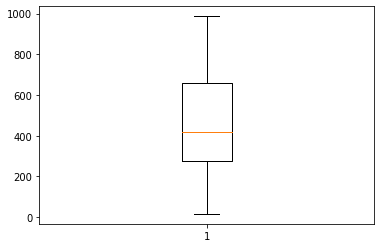

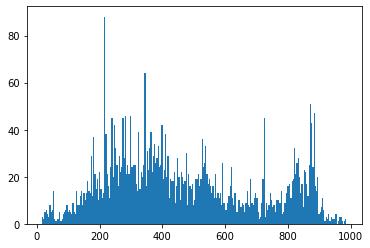

In [6]:
#A boxplot of population density 
x = property_df['pop_dens']
plt.boxplot(x)
plt.show()

#A histogram of population density 
n_bins = 250 
plt.hist(x, n_bins)
plt.show()

### Personalizing the plot 

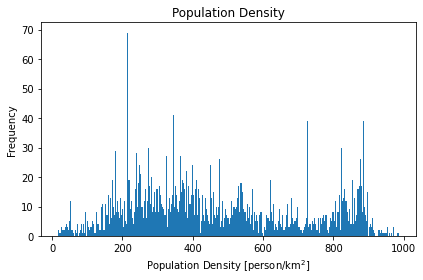

In [7]:
#Define the variable we want to plot and number of bins
x = property_df.pop_dens
n_bins = 500

#Define graph size (x, y) in inches 
plt.figure(figsize = (6, 4))

#Define the histogram function from matplotlib
plt.hist(x, n_bins)

#Create axes labels and title
plt.xlabel('Population Density [$\mathregular{person/km^2}]$')
plt.ylabel ('Frequency')
plt.title ('Population Density')

#Adjust labels to the figure area
plt.tight_layout()

#Save figure to project folder
plt.savefig('pop_dens_hist.jpg')

plt.show()

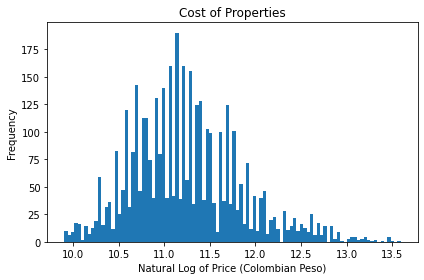

In [8]:
#Define the variable we want to plot and number of bins
x = property_df.lnprice
n_bins = 100

#Define graph size (x, y) in inches 
plt.figure(figsize = (6, 4))

#Define the histogram function from matplotlib
plt.hist(x, n_bins)

#Create axes labels and title
plt.xlabel('Natural Log of Price (Colombian Peso)')
plt.ylabel ('Frequency')
plt.title ('Cost of Properties')

#Adjust labels to the figure area
plt.tight_layout()

#Save figure to project folder
plt.savefig('cost_hist.jpg')

plt.show()

## Dummy Variables 

### Creating a dummy from the SES category 

In [9]:
#The size of each category of socioeconomic status 
property_df.groupby('ses').size()

ses
1.0      26
2.0      79
3.0    2105
4.0    1448
5.0     227
6.0      91
dtype: int64

In [10]:
#Create a dummy for high socioeconomic status 
property_df['high_ses'] = np.where((property_df['ses'] == 5) |
                                    (property_df['ses'] ==6), 1, 0)

In [11]:
property_df.groupby('high_ses').size()

high_ses
0    3658
1     318
dtype: int64

### Creating a binary density variable 

In [12]:
#Find the median of population density 
pop_dens_med = np.median(property_df['pop_dens'])
pop_dens_med

416.32000000000005

In [13]:
#Create a binary density variable of the population
property_df['pop_dens_dummy'] = np.where((property_df['pop_dens']
                                         >= pop_dens_med), 1, 0)
property_df.groupby('pop_dens_dummy').size()

pop_dens_dummy
0    1988
1    1988
dtype: int64

### Creating a different set of categories 

In [14]:
#The size of each category of number of bathrooms 
property_df.groupby('bathrooms').size()

bathrooms
1.0    1021
2.0    1776
3.0     623
4.0     444
5.0     112
dtype: int64

In [15]:
#Recode the number of bathrooms variable
property_df['bathrooms_cat'] = np.where((property_df['bathrooms']>=3), 
                              3, property_df['bathrooms'])
property_df.groupby('bathrooms_cat').size()

bathrooms_cat
1.0    1021
2.0    1776
3.0    1179
dtype: int64

## Scatterplots

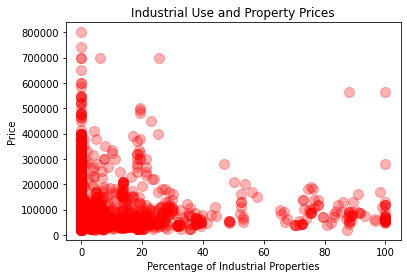

In [16]:
#Define the variables that you will plot in arrays
x = property_df['pcnt_indu']
y = property_df['price']

#Make your scatter plot
plt.scatter(x, y, c ='red', alpha = 0.3, s = 100)
plt.xlabel('Percentage of Industrial Properties')
plt.ylabel('Price')
plt.title('Industrial Use and Property Prices')

plt.show()

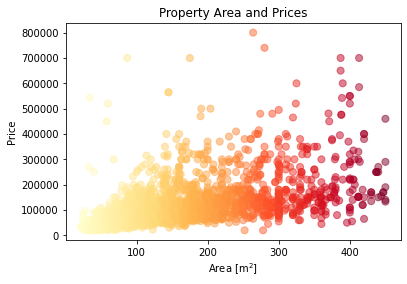

In [17]:
#Define the variables that you will plot in arrays
x = property_df['area_m2']
y = property_df['price']

#Set the index upon which the plot color will be based
c = x

#Make your scatter plot
plt.scatter(x, y, s = 50, alpha = 0.5, c = x, cmap = 'YlOrRd')
plt.xlabel('Area $[\mathregular{m^2}]$')
plt.ylabel('Price')
plt.title('Property Area and Prices')

plt.show()

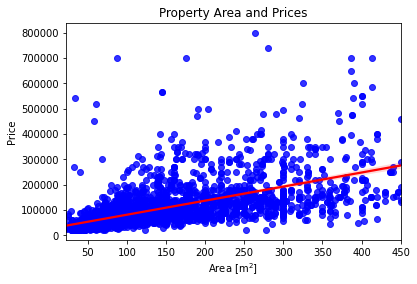

In [18]:
sns.regplot(x = 'area_m2', y = 'price', data = property_df, 
            scatter_kws = {'color': 'blue'}, line_kws = {'color':'red'})

plt.xlabel('Area $[\mathregular{m^2}]$')
plt.ylabel('Price')
plt.title('Property Area and Prices')

plt.show()

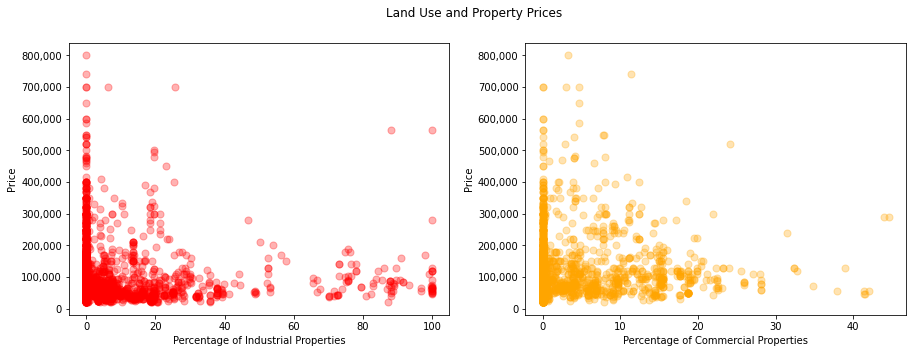

In [19]:
#Define the variables that you will plot in arrays

#Figure 1
x1 = property_df['pcnt_indu']
y1 = property_df['price']

#Figure 2
x2 = property_df['pcnt_com']
y2 = property_df['price']

#Create your figure, and define the number of subplots within it
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))


#Create first subplot
ax1.scatter(x1, y1, c = 'red', alpha = 0.3, s = 50)
ax1.set_xlabel('Percentage of Industrial Properties')
ax1.set_ylabel('Price')
#Format y-axis number to include thousands separator
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y1, loc: "{:,}".format(int(y1))))

#Create second subplot
ax2.scatter(x2, y2, c = 'orange', alpha = 0.3, s = 50)
ax2.set_xlabel('Percentage of Commercial Properties')
ax2.set_ylabel('Price')
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y2, loc: "{:,}".format(int(y2))))

#Create title for the overall figure
plt.suptitle('Land Use and Property Prices')

#Save your figure 
plt.savefig('land_use_properties.jpg')

plt.show()

## Correlation 

### Pairwise Correlation

In [20]:
#Define independent and dependent variables 
x = property_df['pcnt_com']
y = property_df['price']

#Define list to run a pairwise correlation 
cor_list = ['pcnt_com', 'price']
property_df[cor_list].corr()

,pcnt_com,price
pcnt_com,1.000000,0.144652
price,0.144652,1.000000


In [21]:
#Pearsonr function returns the correlation coefficient, and P-value
pearsonr(x, y)

(0.14465194197565664, 4.886971510478706e-20)

### Correlation Matrix 

In [22]:
property_df.corr()

,price,pop_dens,ses,house,apt,pcnt_indu,pcnt_com,pcn_green,homicides,area_m2,bathrooms,lnprice,high_ses,pop_dens_dummy,bathrooms_cat
price,1.000000,0.025395,0.332310,0.272182,-0.272182,-0.017502,0.144652,-0.024504,-0.140996,0.632867,0.438951,0.896713,0.357845,-0.006033,0.407136
pop_dens,0.025395,1.000000,-0.066464,0.186380,-0.186380,-0.031557,-0.026028,-0.030906,0.122644,0.169518,0.085829,0.054929,-0.095480,0.835014,0.063793
ses,0.332310,-0.066464,1.000000,-0.147592,0.147592,-0.083726,0.238816,0.052955,-0.272214,0.101272,0.080532,0.378033,0.685890,-0.096409,0.108801
house,0.272182,0.186380,-0.147592,1.000000,-1.000000,-0.063593,0.040451,-0.071164,0.002256,0.651771,0.391207,0.384840,-0.100795,0.146242,0.337229
apt,-0.272182,-0.186380,0.147592,-1.000000,1.000000,0.063593,-0.040451,0.071164,-0.002256,-0.651771,-0.391207,-0.384840,0.100795,-0.146242,-0.337229
pcnt_indu,-0.017502,-0.031557,-0.083726,-0.063593,0.063593,1.000000,-0.124441,-0.075668,0.366279,-0.081573,0.002761,-0.034886,-0.022799,-0.038342,0.028207
pcnt_com,0.144652,-0.026028,0.238816,0.040451,-0.040451,-0.124441,1.000000,-0.099210,-0.253622,0.158950,0.071197,0.171947,0.319783,-0.046058,0.063169
pcn_green,-0.024504,-0.030906,0.052955,-0.071164,0.071164,-0.075668,-0.099210,1.000000,0.400809,-0.081659,0.004428,0.012233,-0.015300,-0.011647,0.033790
homicides,-0.140996,0.122644,-0.272214,0.002256,-0.002256,0.366279,-0.253622,0.400809,1.000000,-0.155758,-0.023408,-0.160409,-0.109577,0.116457,-0.008343
area_m2,0.632867,0.169518,0.101272,0.651771,-0.651771,-0.081573,0.158950,-0.081659,-0.155758,1.000000,0.530402,0.701998,0.102760,0.129654,0.467238


## Bivarite Linear Regression 

In [23]:
#Define independent variable, and include the intercept 
x = property_df[['pcnt_indu']].assign(Intercept = 1)

#Define dependent variable
y = property_df['pop_dens']

#Run the regression
sm.OLS(y, x, missing='drop').fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.001     
Dependent Variable: pop_dens         AIC:                54780.1146
Date:               2021-01-31 13:13 BIC:                54792.6907
No. Observations:   3976             Log-Likelihood:     -27388.   
Df Model:           1                F-statistic:        3.961     
Df Residuals:       3974             Prob (F-statistic): 0.0466    
R-squared:          0.001            Scale:              56349.    
--------------------------------------------------------------------
             Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
pcnt_indu    -0.5122    0.2573   -1.9904  0.0466   -1.0167   -0.0077
Intercept   472.9112    3.9834  118.7219  0.0000  465.1016  480.7208
-------------------------------------------------------------------
Omnibus:              891.819       Durbin-Watson:          1.519  
Prob(Omnibus):        0.000         Jarque-Bera (JB):       248.782
Skew:                 0.368         Prob(JB):               0.000  
Kurtosis:             2.020         Condition No.:          16     
===================================================================

"""